In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)


Populating the interactive namespace from numpy and matplotlib


In [82]:
#filename = './logs/2018-12-17_18-58-39-.log'
#new_file = './logs/2018-12-17_23-23-09-.log'
#filename = './logs/2019-01-06_19-31-38-.log'
#filename = './logs/2019-01-12_15-29-29-.log'
#filename = './logs/2019-01-14_14-09-12-.log' # small num points
#filename = './logs/2019-01-14_17-55-31-.log' # original num points
#filename = './logs/2019-01-14_23-28-29-.log' # 700 and 350 num points
#filename = "./logs/2019-01-17_09-11-49-.log"
#filename = './logs/2019-01-18_08-02-30-.log' 
#filename = './logs/2019-01-18_11-42-38-.log'
#filename = './logs/2019-02-03_02-53-55-cars_only_boxes.log'
#filename = './logs/2019-02-03_08-57-38-cars_only_masks.log'
#filename = './logs/2019-02-03_09-21-58-.log'
filename = './logs/2019-02-05_11-01-43-ModelTrainer.log'


In [83]:
df = pd.read_csv(filename, sep='|', header=0, skiprows=1).reset_index(drop=True)
df.columns = [str.strip(x) for x in df.columns]
df.head(5)

,epoch,batches_processed,mean_loss,segmentation_accuracy,box_IOU_ground,box_IOU_3d,box_accuracy,seg_loss,stage1_center_loss,center_loss,heading_class_loss,heading_residual_normalized_loss,size_class_loss,size_residuals_normalized_loss,corner_loss,total_loss,lr,bn_decay,flag
0,0,10,69.660713,0.582658,0.076454,0.061350,0.003125,0.594619,5.389076,9.560633,2.368010,0.143181,1.793094,0.071086,4.912070,73.111458,0.001,0.5,Train
1,0,20,94.718658,0.692639,0.121594,0.102361,0.004687,0.558610,6.447669,11.811853,2.436738,0.130056,1.372555,0.077232,6.031203,87.085205,0.001,0.5,Train
2,0,30,101.043571,0.704832,0.117029,0.095406,0.001563,0.519095,5.819800,9.679442,2.426083,0.147604,1.189014,0.091249,5.010478,74.515282,0.001,0.5,Train
3,0,40,90.746773,0.706729,0.131198,0.108575,0.001563,0.561288,8.778191,14.334447,2.136371,0.133608,0.617771,0.058578,7.207971,102.351479,0.001,0.5,Train
4,0,50,72.004356,0.706847,0.169954,0.139539,0.004687,0.507321,6.400419,8.830441,2.312121,0.188692,0.633308,0.060922,4.547425,69.150131,0.001,0.5,Train


0.404064

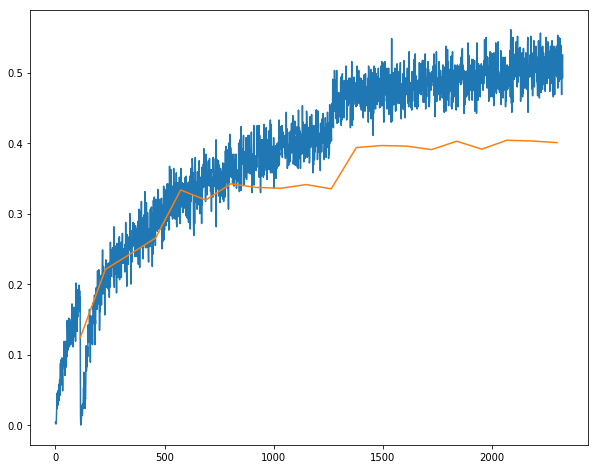

In [84]:
p = 'box_accuracy'
df.groupby('flag')[p].plot()
max(df[(df.flag == ' Val')][p])
#df[(df.flag == ' Val') & (df.epoch == 50)]['box_accuracy']

0.5832689999999999

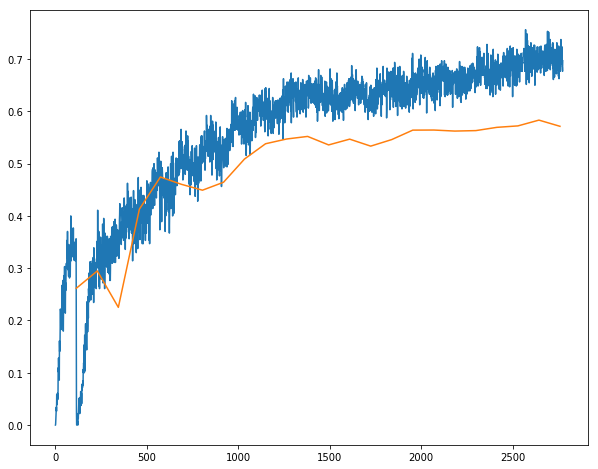

In [169]:
p = 'box_accuracy'
df.groupby('flag')[p].plot()
max(df[(df.flag == ' Val')][p])
#df[(df.flag == ' Val') & (df.epoch == 50)]['box_accuracy']

0.843137

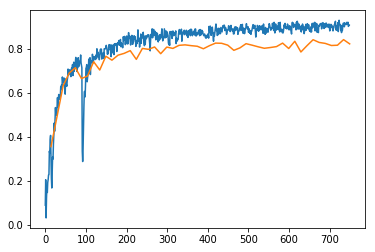

In [87]:
df.groupby('flag')['box_accuracy'].plot()
max(df[df.flag == ' Val']['box_accuracy'])

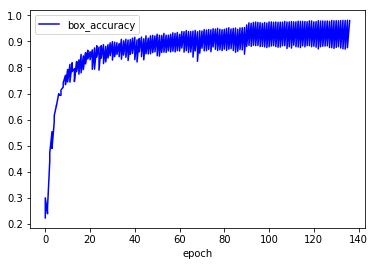

In [69]:
g = df.groupby(['epoch', 'flag'], as_index=False).mean()
g.head(5)

color_dict = {' Train': '#0000ff', ' Val': '#ffa500'}

g.plot(x='epoch', y='box_accuracy', color=[color_dict.get(x, '#333333') for x in g.flag])


flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

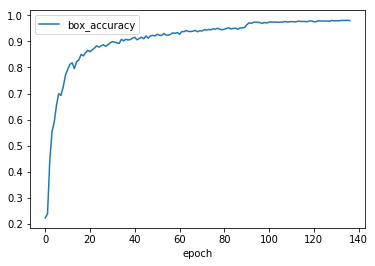

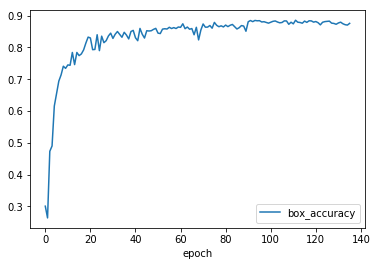

In [60]:
g = df.groupby(['epoch', 'flag'], as_index=False).mean().groupby('flag')[['epoch', 'flag', 'box_accuracy']]
g.plot(x='epoch', y='box_accuracy')
#print(max(df[df['flag'] == ' Val']['box_accuracy']))

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_loss, dtype: object

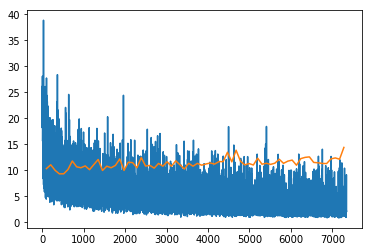

In [114]:
df.groupby('flag')['total_loss'].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: segmentation_accuracy, dtype: object

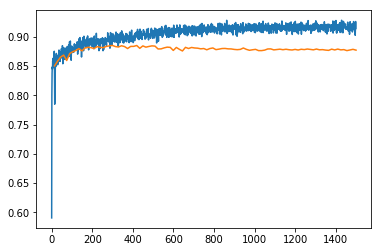

In [46]:
df.groupby('flag')['segmentation_accuracy'].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: segmentation_accuracy, dtype: object

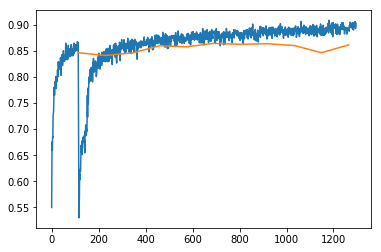

In [7]:
df.groupby('flag')['segmentation_accuracy'].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: seg_loss, dtype: object

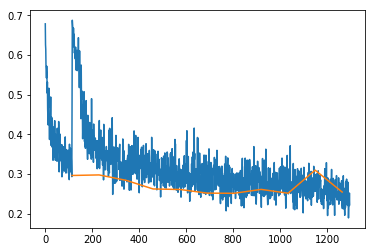

In [6]:
df.groupby('flag')['seg_loss'].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: seg_loss, dtype: object

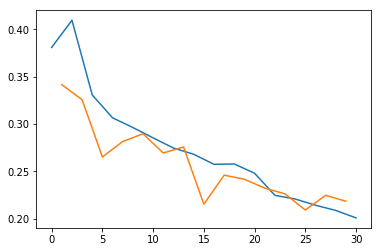

In [59]:
column = 'seg_loss'
x = df.groupby(['epoch', 'flag']).mean()[column].reset_index()
x.groupby('flag')[column].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: box_accuracy, dtype: object

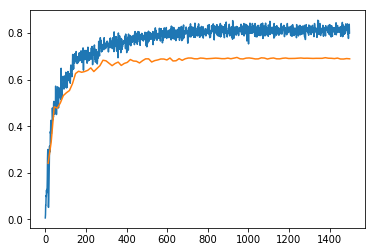

In [48]:
df.groupby('flag')['box_accuracy'].plot()

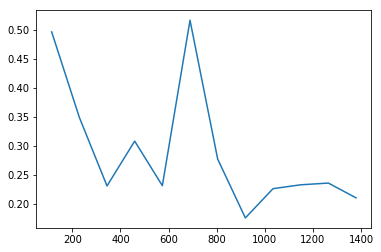

In [16]:
df.groupby(''['corner_loss'].plot()

In [21]:
df.columns

Index(['timestamp', 'epoch', 'batches_processed', 'mean_loss',
       'segmentation_accuracy', 'box_IOU_ground', 'box_IOU_3d', 'box_accuracy',
       'seg_loss', 'stage1_center_loss', 'center_loss', 'heading_class_loss',
       'heading_residual_normalized_loss', 'size_class_loss',
       'size_residuals_normalized_loss', 'corner_loss', 'total_loss', 'flag'],
      dtype='object')

(687, 17)

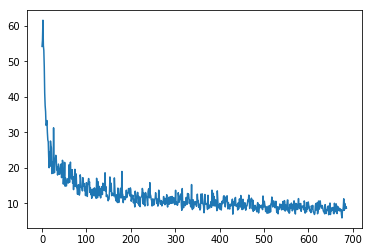

In [142]:
df2 = pd.read_csv(new_file, sep='|', header=1, skiprows=1)
#df2[' total_loss'].plot()
df2[' mean_loss '].plot()
df2.shape

In [144]:
df2.tail()

,timestamp,epoch,batches_processed,mean_loss,segmentation_accuracy,box_IOU_ground,box_IOU_3d,box_accuracy,seg_loss,stage1_center_loss,center_loss,heading_class_loss,heading_residual_normalized_loss,size_class_loss,size_residuals_normalized_loss,corner_loss,total_loss
682,"2018-12-18 00:03:42,487 -",2,2250,9.859812,0.868149,0.624431,0.574328,0.400000,0.328634,0.542452,0.637459,0.968728,0.044568,0.001012,0.038146,0.440902,8.541579
683,"2018-12-18 00:03:46,027 -",2,2260,9.919063,0.877594,0.632127,0.580285,0.365625,0.259985,0.304404,0.177861,0.886085,0.049477,0.001739,0.038216,0.205043,5.434377
684,"2018-12-18 00:03:49,576 -",2,2270,8.480699,0.871716,0.636421,0.583079,0.368750,0.306791,0.823324,0.967508,0.744066,0.042016,0.001491,0.040967,0.603307,10.535904
685,"2018-12-18 00:03:53,126 -",2,2280,9.071413,0.873398,0.642091,0.591352,0.396875,0.294886,0.717242,1.016070,0.999475,0.066391,0.003661,0.021037,0.661688,11.396776
686,"2018-12-18 00:03:56,664 -",2,2290,8.661305,0.887817,0.639921,0.591344,0.418750,0.284508,0.450626,0.328298,0.884690,0.043836,0.001239,0.026188,0.217998,5.529815


In [5]:
df.columns.values

array(['        timestamp ', ' epoch ', ' batches_processed ',
       ' mean_loss ', ' segmentation_accuracy ', ' box_IOU_ground ',
       ' box_IOU_3d ', ' box_accuracy ', ' seg_loss ',
       ' stage1_center_loss ', ' center_loss ', ' heading_class_loss ',
       ' heading_residual_normalized_loss ', ' size_class_loss ',
       ' size_residuals_normalized_loss ', ' corner_loss ', ' total_loss'],
      dtype=object)

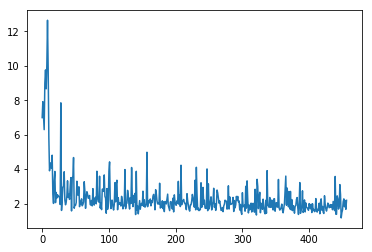

In [18]:
#df[' total_loss'].plot()
df[' stage1_center_loss '].plot()

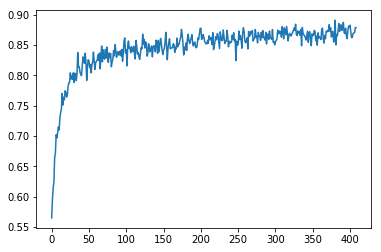

In [7]:
df[' segmentation_accuracy '].plot()

In [40]:
ref_filename = 'logs/run_train-tag-total_loss_1.csv'

In [41]:
ref_df = pd.read_csv(ref_filename)

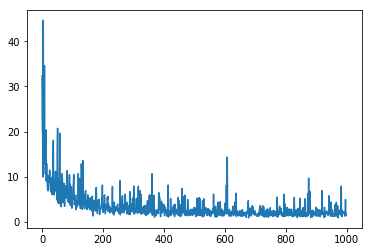

In [42]:
ref_df.Value.plot()
#ref_df

In [43]:
ref_df

,Wall time,Step,Value
0,1.543534e+09,42,32.340008
1,1.543534e+09,167,20.574242
2,1.543534e+09,229,19.340101
3,1.543534e+09,234,9.970661
4,1.543534e+09,474,44.660362
5,1.543534e+09,536,14.441819
6,1.543534e+09,579,12.768376
7,1.543534e+09,586,15.335401
8,1.543534e+09,634,34.565769
9,1.543534e+09,647,12.844904


In [140]:
l = list()
l.append(np.array([]))
len(l)

1